In [1]:
from typing import TypedDict

class State(TypedDict):
    customer_name: str
    my_age: int

In [2]:
def node_1(state: State):
    return state

def node_2(state: State):
    return state

def node_3(state: State):
    return state

In [3]:
import random
from typing import Literal

def route_edge(state: State) -> Literal["node_2", "node_3"]:
    if random.random() < 0.5:
        return 'node_2'
    return 'node_3'


In [4]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, 'node_1')
builder.add_conditional_edges('node_1', route_edge)
builder.add_edge('node_2', END)
builder.add_edge('node_3', END)

agent = builder.compile()

In [5]:
print(agent.get_graph().draw_ascii())

        +-----------+          
        | __start__ |          
        +-----------+          
               *               
               *               
               *               
          +--------+           
          | node_1 |           
          +--------+           
          .         .          
        ..           ..        
       .               .       
+--------+          +--------+ 
| node_2 |          | node_3 | 
+--------+          +--------+ 
          *         *          
           **     **           
             *   *             
          +---------+          
          | __end__ |          
          +---------+          


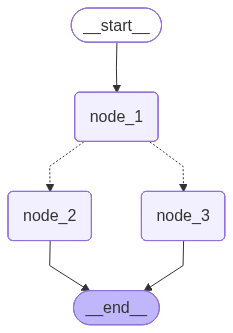

In [6]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))


In [7]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_conditional_edges(START, route_edge)
builder.add_edge('node_2', END)
builder.add_edge('node_3', END)

agent = builder.compile()

In [9]:
print(agent.get_graph().draw_ascii())

        +-----------+          
        | __start__ |          
        +-----------+          
          .         .          
        ..           ..        
       .               .       
+--------+          +--------+ 
| node_2 |          | node_3 | 
+--------+          +--------+ 
          *         *          
           **     **           
             *   *             
          +---------+          
          | __end__ |          
          +---------+          


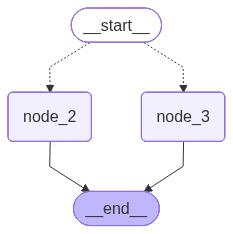

In [8]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))